In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 1. Data Analysis

In [2]:
df = pd.read_csv("data/movimientos.csv", sep=';', encoding='utf-8')
df.shape

(15432, 5)

In [3]:
df_copy = df.copy()
df_copy['date'] = pd.to_datetime(df_copy['fc_oper'], format="%y%m%d")
df_copy.set_index('date', inplace=True)
df_copy.drop(columns='fc_oper', inplace=True)

In [4]:
df_copy.head()

,channel,amount,operations_number,category_name
date,,,,
2019-01-01,Offline,14013.98,106,Mantenimiento y Reparaciones Auto
2019-01-01,Online,30343.54,1607,Gaming
2019-01-01,Offline,319937.82,19080,Supermercados y Pequeño Comercio
2019-01-01,Online,24172.25,2395,Contenidos digitales y media
2019-01-01,Online,27734.58,315,Mantenimiento y Reparaciones Auto


In [5]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15432 entries, 2019-01-01 to 2020-10-04
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   channel            15432 non-null  object 
 1   amount             15432 non-null  float64
 2   operations_number  15432 non-null  int64  
 3   category_name      15432 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 602.8+ KB


No hay valores nulos en ninguna columna.

A continuación filtro los datos por fecha agrupados por categoría y canal, generando dos DataFrames distintos: uno con los datos correspondientes a los meses de pandemia y otro con los datos correspondientes a los mismos meses del año pasado.

In [6]:
# DATA DURING THE COVID PERIOD
af_covid_df = df_copy.loc['2020-03-01':].groupby(by=['category_name', 'channel']).sum()  #.agg({'amount':'sum', 'operations_number':'sum'})
af_covid_df.columns = af_covid_df.columns.values + "_After_Covid"

In [7]:
df_copy.index.max()

Timestamp('2020-10-04 00:00:00')

In [8]:
# DATA BEFORE COVID WITHIN THE SAME DATES
bf_covid_df = df_copy.loc['2019-03-01':'2019-10-04'].groupby(by=['category_name', 'channel']).sum()
bf_covid_df.columns = bf_covid_df.columns.values + "_Before_Covid"

Junto los datos generados en un mismo DataFrame.

In [9]:
new_df = pd.concat([bf_covid_df, af_covid_df], axis=1)
new_df.head()

amount_Before_Covid  \
category_name          channel                        
Alojamiento            Offline         3.172519e+08   
                       Online          1.191682e+08   
Bar y Discotecas       Offline         2.731894e+07   
                       Online          8.893564e+05   
Bricolaje y Jardinería Offline         2.616738e+08   

                                operations_number_Before_Covid  \
category_name          channel                                   
Alojamiento            Offline                         2463775   
                       Online                           568424   
Bar y Discotecas       Offline                         1272732   
                       Online                            18322   
Bricolaje y Jardinería Offline                         4285020   

                                amount_After_Covid  \
category_name          channel                       
Alojamiento            Offline        1.505664e+08   
                       Online         6.285560e+07   
Bar y Discotecas       Offline        1.214223e+07   
                       Online         2.888120e+05   
Bricolaje y Jardinería Offline        2.665164e+08   

                                operations_number_After_Covid  
category_name          channel                                 
Alojamiento            Offline                        1420743  
                       Online                          275168  
Bar y Discotecas       Offline                         591495  
                       Online                            8983  
Bricolaje y Jardinería Offline                        4784789

Y añado dos nuevas columnas con la información que hace referencia a la diferencia de gasto y de número de operaciones entre el periodo de pandemia y el mismo periodo del año pasado.

In [10]:
new_df['amount_Diff'] = new_df['amount_After_Covid'] - new_df['amount_Before_Covid']
new_df['ops_Diff'] = new_df['operations_number_After_Covid'] - new_df['operations_number_Before_Covid']
new_df[['amount_Diff', 'ops_Diff']].head()

amount_Diff  ops_Diff
category_name          channel                        
Alojamiento            Offline -1.666855e+08  -1043032
                       Online  -5.631257e+07   -293256
Bar y Discotecas       Offline -1.517671e+07   -681237
                       Online  -6.005444e+05     -9339
Bricolaje y Jardinería Offline  4.842651e+06    499769

In [11]:
new_df.sort_values(by='amount_Diff')[['amount_Diff', 'ops_Diff']]

amount_Diff  ops_Diff
category_name                     channel                        
Restaurantes y Cafeterías         Offline -2.762324e+08  -7122120
Combustible y Recarga             Offline -2.138462e+08  -4440300
Alojamiento                       Offline -1.666855e+08  -1043032
                                  Online  -5.631257e+07   -293256
Mantenimiento y Reparaciones Auto Offline -4.430652e+07   -199970
Peluquería y Barbería             Offline -3.365476e+07   -847683
Bar y Discotecas                  Offline -1.517671e+07   -681237
                                  Online  -6.005444e+05     -9339
Combustible y Recarga             Online  -1.288207e+05     -3702
Tabaco, Alcohol y Otros           Online   2.245875e+05      3143
Contenidos digitales y media      Offline  2.632912e+05    -35090
Peluquería y Barbería             Online   1.157827e+06     14692
Contenidos digitales y media      Online   1.527270e+06    152552
Gaming                            Offline  2.934642e+06    229720
Mantenimiento y Reparaciones Auto Online   4.132364e+06     18638
Bricolaje y Jardinería            Offline  4.842651e+06    499769
Restaurantes y Cafeterías         Online   5.242542e+06    269575
Farmacias, Ópticas y Ortopedias   Online   6.290810e+06    105114
Gaming                            Online   6.577574e+06    454677
Bricolaje y Jardinería            Online   1.554082e+07    141043
Farmacias, Ópticas y Ortopedias   Offline  4.481262e+07   2584058
Tabaco, Alcohol y Otros           Offline  5.939923e+07   2218293
Supermercados y Pequeño Comercio  Online   1.675249e+08   2613405
                                  Offline  6.996774e+08  16403800

Después de ordenar los valores por la diferencia de gasto, se puede observar como las tres categorías/sectores más afectados negativamente son la venta *offline* de 'Restaurantes y Cafeterías', 'Combustible y Recarga', 'Alojamiento'.

Mientras que la venta, tanto *online* como *offline* de 'Supermercados y Pequeño Comercio' y la venta *offline* de 'Tabaco, Alcohol y Otros' son las tres categorías/sectores que han tenido un mayor beneficio en comparación con el mismo periodo del año pasado.

In [12]:
new_df.reset_index(level=['category_name', 'channel'], inplace=True)

In [13]:
new_df.groupby('channel').sum().sort_values(by='amount_Diff')[['amount_Diff', 'ops_Diff']]

,amount_Diff,ops_Diff
channel,,
Offline,6.202783e+07,7566208
Online,1.511767e+08,3466542


In [14]:
new_df.groupby('category_name').sum().sort_values(by='amount_Diff')[['amount_Diff', 'ops_Diff']]

,amount_Diff,ops_Diff
category_name,,
Restaurantes y Cafeterías,-2.709898e+08,-6852545
Alojamiento,-2.229980e+08,-1336288
Combustible y Recarga,-2.139751e+08,-4444002
Mantenimiento y Reparaciones Auto,-4.017415e+07,-181332
Peluquería y Barbería,-3.249693e+07,-832991
Bar y Discotecas,-1.577725e+07,-690576
Contenidos digitales y media,1.790562e+06,117462
Gaming,9.512217e+06,684397
Bricolaje y Jardinería,2.038347e+07,640812


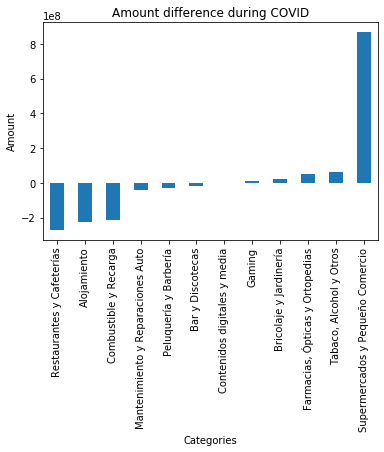

In [15]:
ax = new_df.groupby('category_name').sum().sort_values(by='amount_Diff')['amount_Diff'].plot.bar(title="Amount difference during COVID")
ax.set(xlabel="Categories", ylabel="Amount");

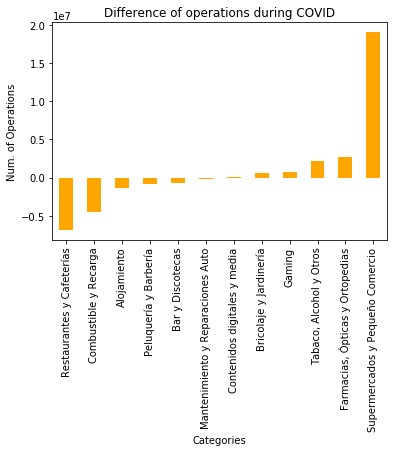

In [16]:
ax = new_df.groupby('category_name').sum().sort_values(by='ops_Diff')['ops_Diff'].plot.bar(color='orange', title="Difference of operations during COVID")
ax.set(xlabel="Categories", ylabel="Num. of Operations");

Sin tener en cuenta el canal, los gráficos de arriba muestran el impacto, ordenado de más negativo a más positivo, agrupando los datos por categoría y ordenando por la diferencia de gasto primero y del número de operaciones después.

In [17]:
new_df[new_df['category_name'] == 'Contenidos digitales y media'][['category_name', 'channel', 'amount_Diff', 'ops_Diff']]

,category_name,channel,amount_Diff,ops_Diff
8,Contenidos digitales y media,Offline,263291.24,-35090
9,Contenidos digitales y media,Online,1527270.28,152552


En lo que se refiere a la categoría 'Contenidos digitales y media', se puede apreciar claramente el impacto de la pandemia, en el sentido de que la gente sale menos de casa y compra más por internet, ya que en este caso se ha reducido el número de operaciones *offline* y al mismo tiempo se ha aumentado en gran medida el número de operaciones *online* (152552 más con respecto al mismo periodo del año pasado).

En términos globales, el sector ha recaudado 1.790.561.52€ más que el año pasado en este periodo, por lo que podemos decir que el impacto ha sido positivo.

# 2. Time Series Forecasting

Creo un nuevo DataFrame (a partir de los datos de que dispongo) en el cual cada columna represente una categoría distinta para los ingresos (amount) de cada día independientemente del canal.

In [18]:
df_amount = df_copy.groupby(['date', 'category_name']).sum()['amount'].reset_index('category_name')
df_amount.head()

,category_name,amount
date,,
2019-01-01,Alojamiento,2029809.24
2019-01-01,Bar y Discotecas,247499.57
2019-01-01,Bricolaje y Jardinería,30709.62
2019-01-01,Combustible y Recarga,1475671.40
2019-01-01,Contenidos digitales y media,51292.98


In [19]:
for category in df_amount['category_name'].unique():
    df_amount[category] = df_amount[df_amount['category_name'] == category]['amount']
    
df_amount = df_amount.drop(columns=['category_name', 'amount']).drop_duplicates()
df_amount.index.freq = 'D'
df_amount.head()

,Alojamiento,Bar y Discotecas,Bricolaje y Jardinería,Combustible y Recarga,Contenidos digitales y media,"Farmacias, Ópticas y Ortopedias",Gaming,Mantenimiento y Reparaciones Auto,Peluquería y Barbería,Restaurantes y Cafeterías,Supermercados y Pequeño Comercio,"Tabaco, Alcohol y Otros"
date,,,,,,,,,,,,
2019-01-01,2029809.24,247499.57,30709.62,1475671.40,51292.98,138792.95,94493.59,41748.56,12409.38,4027875.29,561607.26,7884.29
2019-01-02,1875531.28,69765.86,1330808.96,2864746.57,49111.49,1014899.87,269860.98,1444532.62,655446.13,2745186.73,12667685.15,420159.80
2019-01-03,1346418.57,73202.93,1209094.35,2715434.11,43818.51,978375.88,265297.85,1666504.29,796964.53,3167882.11,12253009.36,381762.56
2019-01-04,1482828.56,86006.28,1241590.37,2878267.21,43923.04,982210.52,265322.21,2141027.72,939922.05,3936732.73,13989579.32,427399.03
2019-01-05,1165678.76,131342.63,935579.46,2161409.65,42897.95,716494.90,240817.02,523539.50,559079.19,4999902.13,14843612.61,373723.01


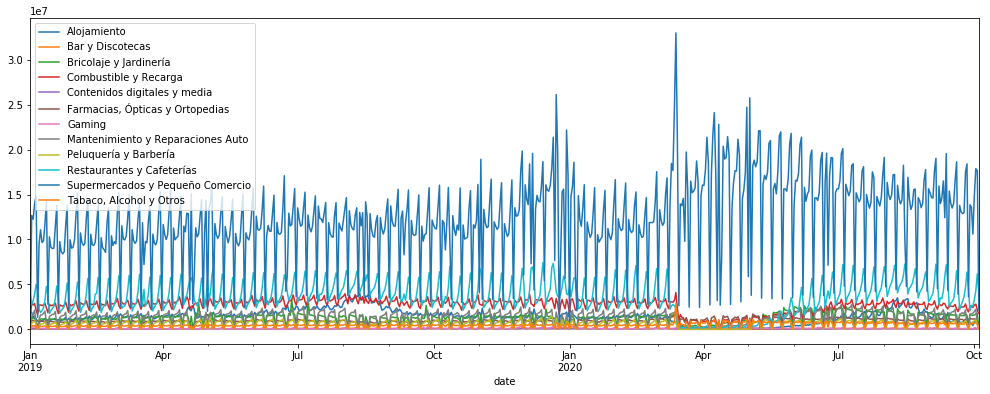

In [20]:
df_amount.plot(figsize=(17,6));

___

Primero, vamos a ver como realizar TS forecasting tomando, por ejemplo, la categoría "Bar y Discotecas".

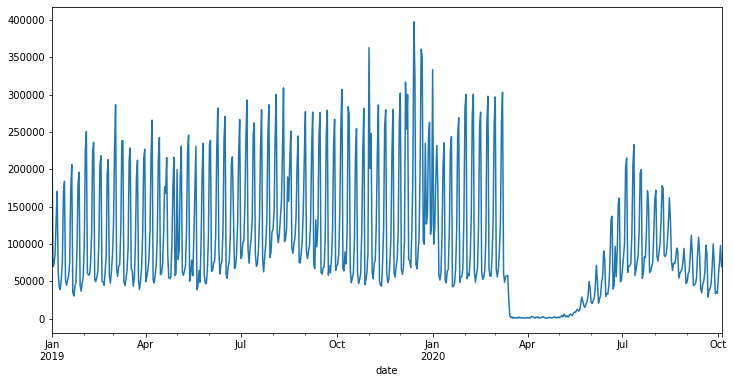

In [21]:
df_amount['Bar y Discotecas'].plot(figsize=(12,6));

In [22]:
# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

### Run an ETS Decomposition

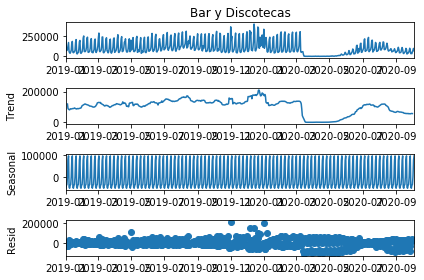

In [23]:
result = seasonal_decompose(df_amount['Bar y Discotecas'], model='add')
result.plot();

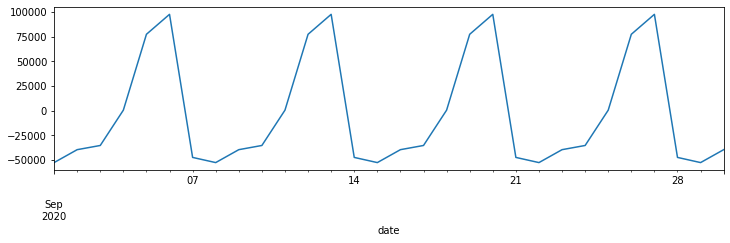

In [24]:
result.seasonal.loc['2020-09-01':'2020-09-30'].plot(figsize=(12,3));

Haciendo zoom al mes de Septiembre se ve como la estacionalidad (*seasonality*) es semanal.

### Run pmdarima.auto_arima to obtain recommended orders

In [25]:
auto_arima(df_amount['Bar y Discotecas'], seasonal=True, m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  643
Model:             SARIMAX(5, 1, 2)x(2, 0, [1], 7)   Log Likelihood               -7556.599
Date:                             Mon, 14 Dec 2020   AIC                          15135.198
Time:                                     14:08:30   BIC                          15184.309
Sample:                                          0   HQIC                         15154.258
                                             - 643                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3297      0.205      1.605      0.109      -0.073       0.732
ar.L2         -0.4366      0.068     -6.463      0.000      -0.569      -0.304
ar.L3         -0.1845      0.077     -2.390      0.017      -0.336      -0.033
ar.L4         -0.2323      0.061     -3.824      0.000      -0.351      -0.113
ar.L5         -0.1283      0.070     -1.836      0.066      -0.265       0.009
ma.L1         -0.9365      0.199     -4.696      0.000      -1.327      -0.546
ma.L2          0.3572      0.152      2.345      0.019       0.059       0.656
ar.S.L7        1.1611      0.054     21.629      0.000       1.056       1.266
ar.S.L14      -0.1746      0.049     -3.584      0.000      -0.270      -0.079
ma.S.L7       -0.8460      0.045    -18.765      0.000      -0.934      -0.758
sigma2      1.083e+09   1.05e-10   1.03e+19      0.000    1.08e+09    1.08e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.78   Jarque-Bera (JB):              6289.46
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                             0.37
Prob(H) (two-sided):                  0.88   Kurtosis:                        18.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.07e+34. Standard errors may be unstable.
"""

De este modo, para el modelo SARIMA obtenemos un *order* de (5, 1, 2) combinado con un *seasonal order* de (2, 0, 1, 7).

Ahora voy a entrenar y evaluar el model SARIMA(5,1,2)(2,0,1,7) y dar una predicción para valores futuros.

### Split the data into train/test sets

In [26]:
train = df_amount.loc[:'2020-08-31']
test = df_amount.loc['2020-09-01':'2020-09-30']

### Fit a SARIMA(5,1,2)(2,0,1,7) Model

In [27]:
model = SARIMAX(train['Bar y Discotecas'], order=(5,1,2), seasonal_order=(2,0,1,7))
results = model.fit()
results.summary()

/Users/csr95/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                    Bar y Discotecas   No. Observations:                  609
Model:             SARIMAX(5, 1, 2)x(2, 0, [1], 7)   Log Likelihood               -7172.295
Date:                             Mon, 14 Dec 2020   AIC                          14366.589
Time:                                     14:08:32   BIC                          14415.101
Sample:                                 01-01-2019   HQIC                         14385.463
                                      - 08-31-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3304      0.214      1.545      0.122      -0.089       0.750
ar.L2         -0.4395      0.071     -6.226      0.000      -0.578      -0.301
ar.L3         -0.1859      0.081     -2.288      0.022      -0.345      -0.027
ar.L4         -0.2335      0.064     -3.656      0.000      -0.359      -0.108
ar.L5         -0.1292      0.073     -1.758      0.079      -0.273       0.015
ma.L1         -0.9371      0.208     -4.516      0.000      -1.344      -0.530
ma.L2          0.3599      0.158      2.274      0.023       0.050       0.670
ar.S.L7        1.1616      0.056     20.801      0.000       1.052       1.271
ar.S.L14      -0.1749      0.051     -3.448      0.001      -0.274      -0.075
ma.S.L7       -0.8485      0.047    -18.173      0.000      -0.940      -0.757
sigma2      1.141e+09   9.95e-11   1.15e+19      0.000    1.14e+09    1.14e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.75   Jarque-Bera (JB):              5290.24
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                             0.37
Prob(H) (two-sided):                  0.73   Kurtosis:                        17.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.17e+35. Standard errors may be unstable.
"""

### Obtain predicted values

In [28]:
start=len(train)
end=len(train)+len(test)-1  # _ + 30 - 1

# dynamic=False: Forecasts at each point are generated using the full history up to that point (all lagged values)
# typ='levels': Predicts the levels of the original endogenous variables. If we'd used the default typ='linear' we would have seen linear predictions in terms of the differenced endogenous variables.

predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(5,1,2)(2,0,1,7) Predictions')

Comparo las predicciones con los values reales del mes de Septiembre correspondientes a la categoría "Bar y Discotecas".

In [29]:
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['Bar y Discotecas'][i]}")

predicted=52832.15255, expected=48957.22
predicted=57315.41937, expected=60279.17
predicted=57715.49322, expected=63297.43
predicted=67448.15745, expected=84692.34000000001
predicted=92835.5273 , expected=111624.93
predicted=84961.01103, expected=85650.06
predicted=36487.08017, expected=43965.130000000005
predicted=43224.89126, expected=45318.47
predicted=51011.1853 , expected=46697.39
predicted=51446.60034, expected=54220.729999999996
predicted=63660.70869, expected=87201.58
predicted=93547.97181, expected=108953.15
predicted=87725.60091, expected=84784.55
predicted=32551.40159, expected=39977.37
predicted=37469.74277, expected=34557.880000000005
predicted=45359.59208, expected=46253.25
predicted=46783.26292, expected=50331.05
predicted=60891.6721 , expected=63226.24
predicted=92145.63186, expected=98177.14
predicted=86515.13318, expected=86219.58
predicted=29909.56154, expected=29004.36
predicted=33534.25523, expected=38231.32
predicted=41081.36043, expected=39958.44
predicted=43090.

### Evaluate the model

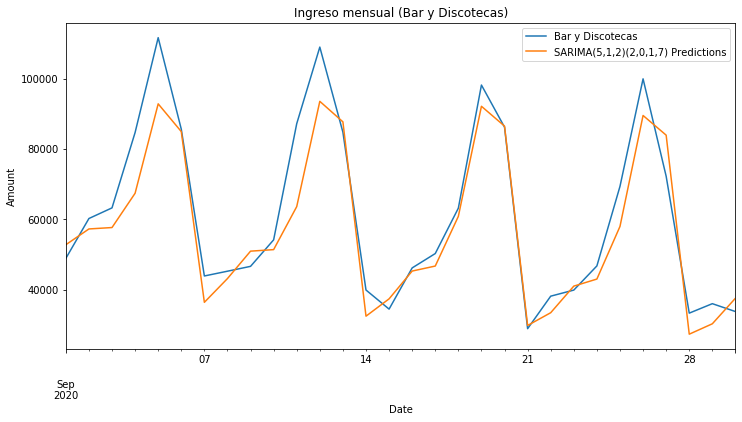

In [30]:
ax = test['Bar y Discotecas'].plot(legend=True, figsize=(12,6), title="Ingreso mensual (Bar y Discotecas)")
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel='Date', ylabel='Amount');

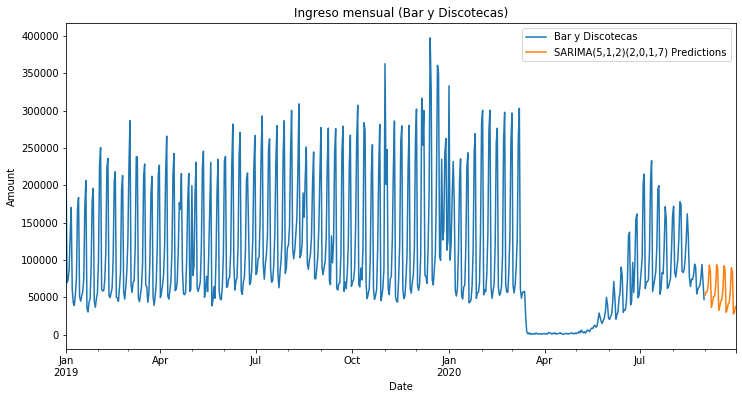

In [31]:
ax = train['Bar y Discotecas'].plot(legend=True, figsize=(12,6), title="Ingreso mensual (Bar y Discotecas)")
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel='Date', ylabel='Amount');

In [32]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

error = mean_squared_error(test['Bar y Discotecas'], predictions)
print(f'SARIMA(5,1,2)(2,0,1,7) MSE Error: {error:11.10}')

error = rmse(test['Bar y Discotecas'], predictions)
print(f'SARIMA(5,1,2)(2,0,1,7) RMSE Error: {error:11.10}')

print(f"Mean real values: {test['Bar y Discotecas'].mean()}")

SARIMA(5,1,2)(2,0,1,7) MSE Error: 73526429.87
SARIMA(5,1,2)(2,0,1,7) RMSE Error: 8574.755382
Mean real values: 61446.55966666667


Observando los gráficos y el RMSE se puede decir que el modelo se comporta bastante bien teniendo en cuenta que el orden los de los valores reales está en 61.000 mientras que el RMSE tiene un orden de 8.500. Aún así es mejorable, se ve que tiene problemas para predecir los picos reales.

___

Ahora repito el proceso anterior para la categoría "Tabaco, Alcohol y Otros".

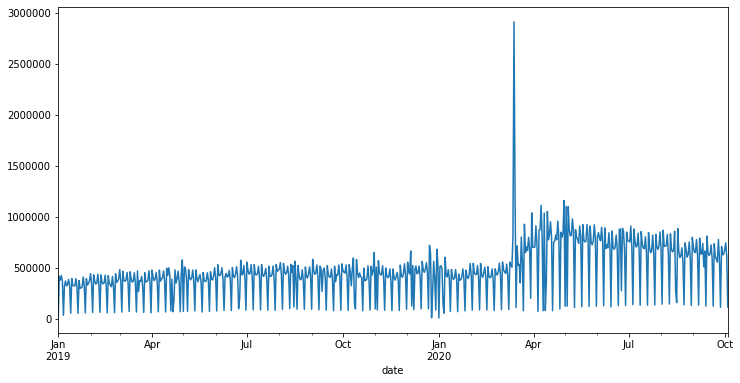

In [33]:
df_amount['Tabaco, Alcohol y Otros'].plot(figsize=(12,6));

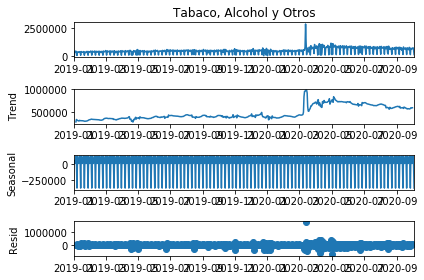

In [34]:
result = seasonal_decompose(df_amount['Tabaco, Alcohol y Otros'], model='add')
result.plot();

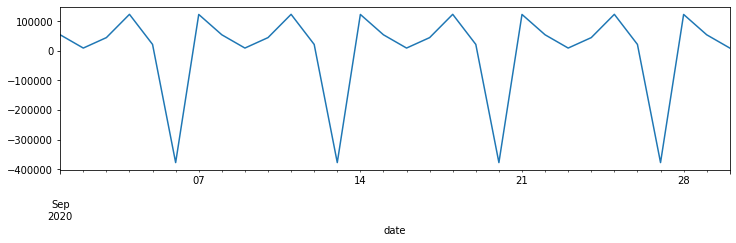

In [35]:
result.seasonal.loc['2020-09-01':'2020-09-30'].plot(figsize=(12,3));

En este caso la estacionalidad (*seasonality*) también es semanal.

In [36]:
auto_arima(df_amount['Tabaco, Alcohol y Otros'], seasonal=True, m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  643
Model:             SARIMAX(4, 1, 2)x(1, 0, [1], 7)   Log Likelihood               -8548.735
Date:                             Mon, 14 Dec 2020   AIC                          17115.469
Time:                                     14:09:38   BIC                          17155.650
Sample:                                          0   HQIC                         17131.063
                                             - 643                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6206      0.428     -1.448      0.148      -1.460       0.219
ar.L2          0.0020      0.057      0.036      0.972      -0.110       0.114
ar.L3          0.0288      0.063      0.460      0.646      -0.094       0.151
ar.L4         -0.0307      0.082     -0.377      0.707      -0.191       0.129
ma.L1         -0.2622      0.424     -0.618      0.537      -1.094       0.570
ma.L2         -0.6361      0.391     -1.626      0.104      -1.403       0.131
ar.S.L7        0.9952      0.007    134.776      0.000       0.981       1.010
ma.S.L7       -0.8919      0.033    -26.858      0.000      -0.957      -0.827
sigma2      2.827e+10   4.62e-10   6.12e+19      0.000    2.83e+10    2.83e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            404079.05
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               9.98   Skew:                             6.26
Prob(H) (two-sided):                  0.00   Kurtosis:                       125.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.16e+34. Standard errors may be unstable.
"""

In [37]:
model = SARIMAX(train['Tabaco, Alcohol y Otros'], order=(4,1,2), seasonal_order=(1,0,1,7))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Tabaco, Alcohol y Otros   No. Observations:                  609
Model:             SARIMAX(4, 1, 2)x(1, 0, [1], 7)   Log Likelihood               -8109.405
Date:                             Mon, 14 Dec 2020   AIC                          16236.811
Time:                                     14:09:39   BIC                          16276.502
Sample:                                 01-01-2019   HQIC                         16252.253
                                      - 08-31-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6128      0.440     -1.394      0.163      -1.474       0.249
ar.L2          0.0038      0.060      0.063      0.949      -0.113       0.121
ar.L3          0.0299      0.065      0.464      0.643      -0.097       0.157
ar.L4         -0.0311      0.085     -0.366      0.715      -0.198       0.136
ma.L1         -0.2660      0.435     -0.611      0.541      -1.119       0.587
ma.L2         -0.6334      0.401     -1.579      0.114      -1.420       0.153
ar.S.L7        0.9949      0.008    122.976      0.000       0.979       1.011
ma.S.L7       -0.8880      0.036    -24.861      0.000      -0.958      -0.818
sigma2      2.936e+10   4.49e-10   6.54e+19      0.000    2.94e+10    2.94e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            353604.08
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               9.96   Skew:                             6.16
Prob(H) (two-sided):                  0.00   Kurtosis:                       120.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.79e+34. Standard errors may be unstable.
"""

In [38]:
start=len(train)
end=len(train)+len(test)-1  # _ + 30 - 1

predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(4,1,2)(1,0,1,7) Predictions')

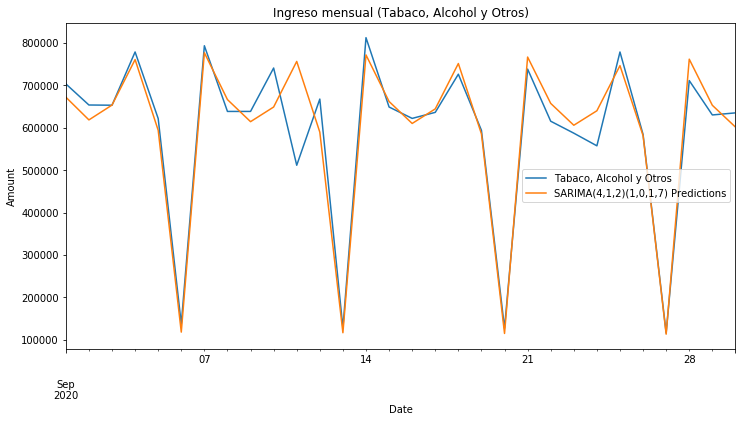

In [39]:
ax = test['Tabaco, Alcohol y Otros'].plot(legend=True, figsize=(12,6), title="Ingreso mensual (Tabaco, Alcohol y Otros)")
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel='Date', ylabel='Amount');

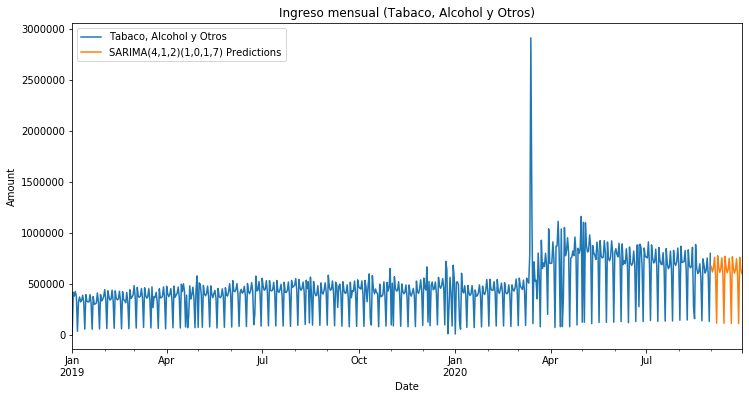

In [40]:
ax = train['Tabaco, Alcohol y Otros'].plot(legend=True, figsize=(12,6), title="Ingreso mensual (Tabaco, Alcohol y Otros)")
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel='Date', ylabel='Amount');

In [41]:
error = mean_squared_error(test['Tabaco, Alcohol y Otros'], predictions)
print(f'SARIMA(5,1,2)(2,0,1,7) MSE Error: {error:11.10}')

error = rmse(test['Tabaco, Alcohol y Otros'], predictions)
print(f'SARIMA(5,1,2)(2,0,1,7) RMSE Error: {error:11.10}')

print(f"Mean real values: {test['Tabaco, Alcohol y Otros'].mean()}")

SARIMA(5,1,2)(2,0,1,7) MSE Error: 3.264352721e+09
SARIMA(5,1,2)(2,0,1,7) RMSE Error: 57134.51427
Mean real values: 593061.2983333333


Podríamos decir que este model se tiene incluso un mejor rendimiento que para la categoría anterior.